In [1]:
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pandas as pd
import numpy as np
import pickle as pk
import draftAnal as DA
import os
import pylab
from scipy.spatial.distance import euclidean
import seaborn as sns
from fastdtw import fastdtw

In [2]:
with open("./Data/OUTPUT/Data07-11-2019-21-56.p","rb") as file:
    Data = pk.load(file)

In [30]:
distance = np.zeros((len(Data), len(Data)))
for i, author1 in enumerate(Data):
    for j, author2 in enumerate(Data):
        x=author1.drafts[author1.Last4].contigData.distance
        y=author2.drafts[author2.Last4].contigData.distance
        distance[i,j], _ = fastdtw(x, y, dist=euclidean)

In [31]:
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm
import matplotlib.colors as colors
cmap = cm.plasma(np.linspace(0.0, 1, 3))
sch.set_link_color_palette([colors.rgb2hex(rgb[:3]) for rgb in cmap])

/home/ruggiero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Use the colorbar set_ticks() method instead.
/home/ruggiero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


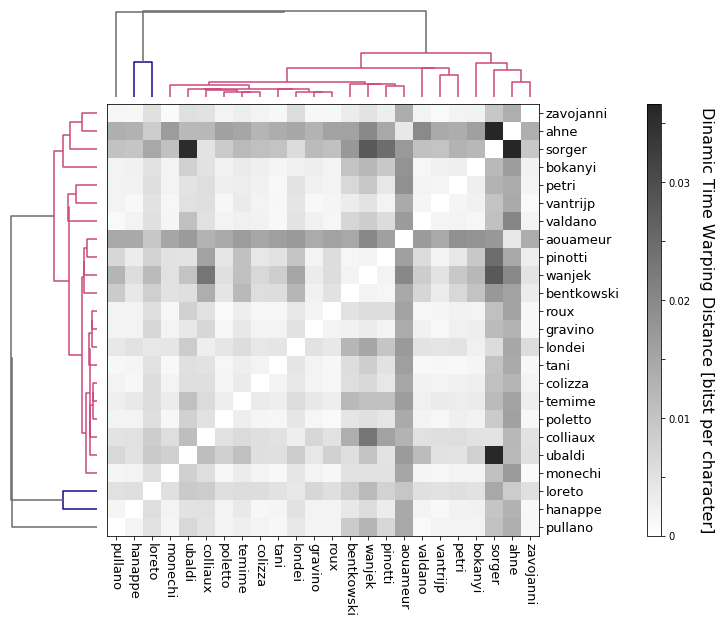

In [45]:
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(10,10))
ax1 = fig.add_axes([0.162,0.1,0.125,0.6])
Y = sch.linkage(distance, method='centroid')
Z1 = sch.dendrogram(Y, orientation='left', above_threshold_color='dimgrey')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.axis('off')
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.125])
Z2 = sch.dendrogram(Y, above_threshold_color='dimgrey')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.axis('off')
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves'][::-1]
idx2 = Z2['leaves']
distance_new = distance[idx1,:]
distance_new = distance_new[:,idx1]
im = axmatrix.matshow(distance, aspect='auto', origin='lower', cmap=sns.cubehelix_palette(light=1, as_cmap=True, hue=0.),
                     vmin=distance.min(),vmax=distance.max())
axmatrix.set_xticks([])
axmatrix.set_yticks([])

axmatrix.set_xticks(range(len(Data)))
axmatrix.set_xticklabels(np.array([d.name for d in Data])[idx2], minor=False, fontsize=13)
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()

pylab.xticks(rotation=-90)

axmatrix.set_yticks(range(len(Data)))
axmatrix.set_yticklabels(np.array([d.name for d in Data])[idx2], minor=False, fontsize=13)
axmatrix.yaxis.set_label_position('right')
axmatrix.yaxis.tick_right()

#Plot colorbar.
axcolor = fig.add_axes([1.05,0.1,0.02,0.6])
cbar = pylab.colorbar(im, cax=axcolor)
cbar.ax.set_yticks([0,0.005,0.01,0.015,0.02,0.025,0.03])
cbar.ax.set_yticklabels(['0','','0.01','','0.02','',0.03],fontsize=10)
cbar.set_label('Dinamic Time Warping Distance [bitst per character]', labelpad=24,rotation=270, fontsize=16)
fig.show()
plt.savefig("DTSclustering.jpg")

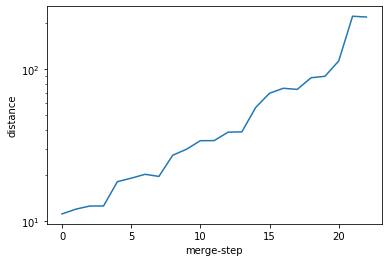

In [46]:
p = plt.plot(Y[:,2])
plt.ylabel("distance")
plt.xlabel("merge-step")
plt.yscale('log')

### mostra la traiettoria media per un numero fissato di cluster

['hanappe', 'loreto']
['pinotti', 'poletto', 'valdano', 'gravino', 'vantrijp', 'londei', 'bentkowski', 'colliaux', 'tani', 'petri', 'ubaldi', 'roux', 'wanjek', 'temime', 'monechi', 'aouameur', 'colizza']
['bokanyi', 'ahne', 'sorger', 'zavojanni']
['pullano']


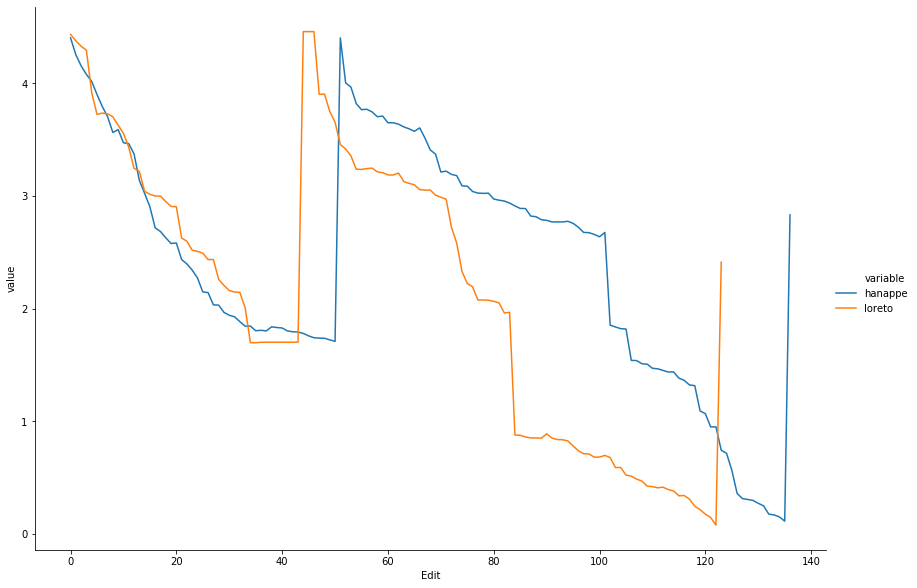

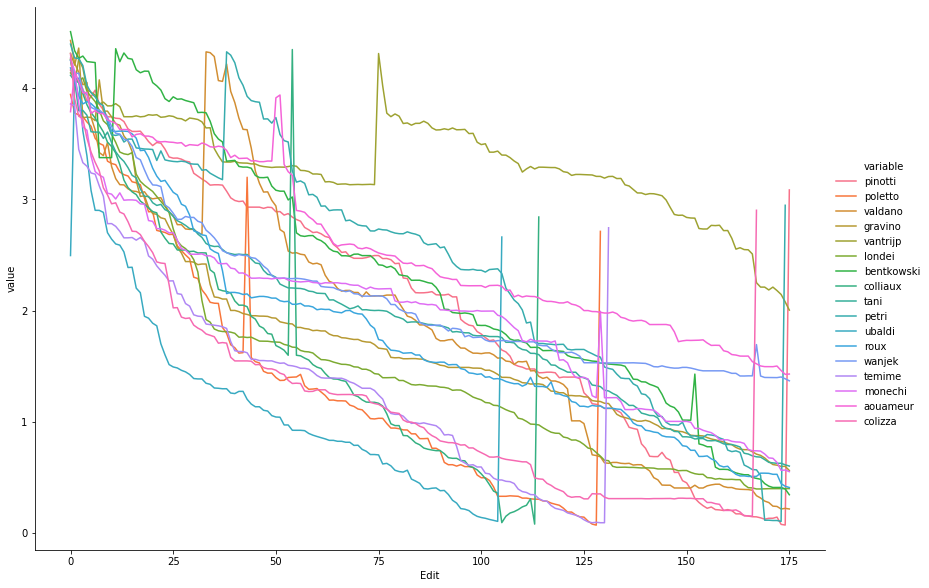

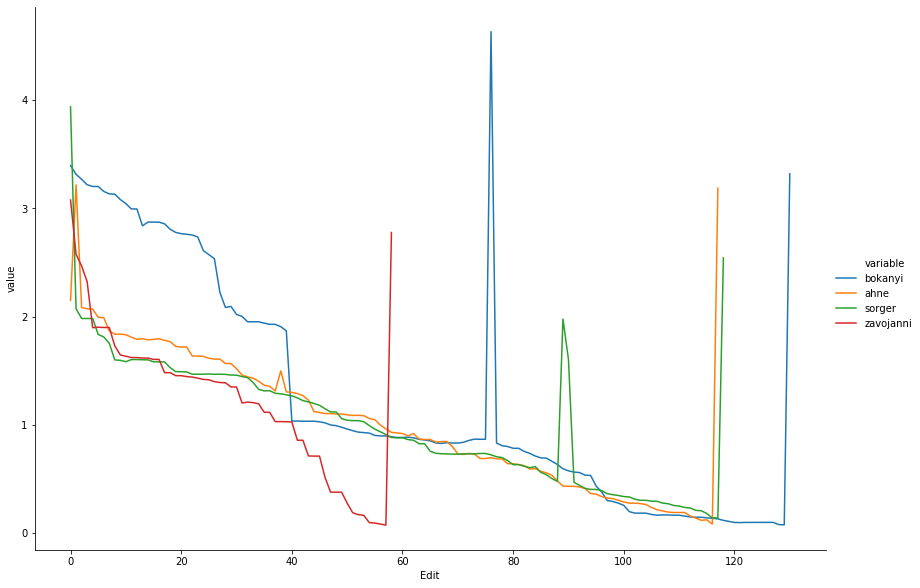

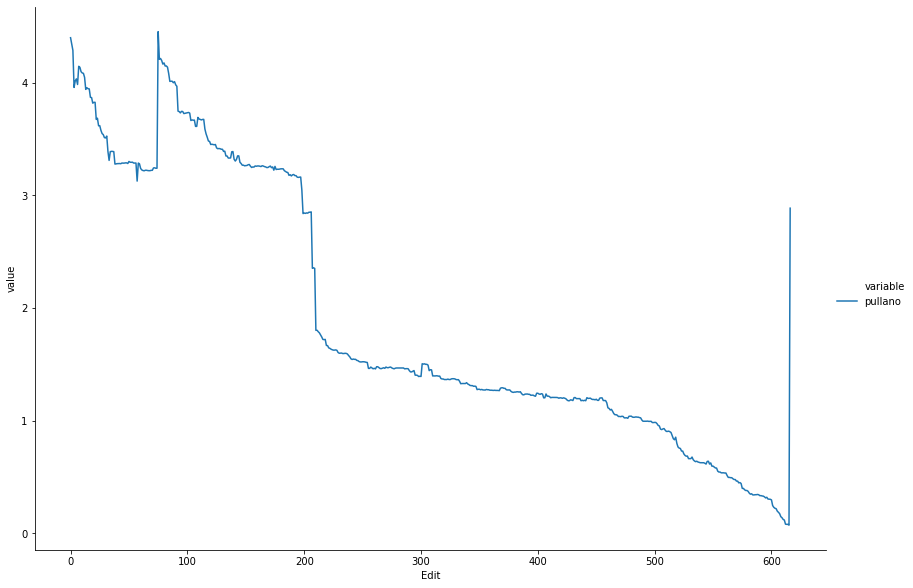

In [57]:
k = 4 #numero di cluster
ClIndex = sch.fcluster(Y, k, criterion='maxclust')

clusters = [[] for _ in range(0,k)]
for i, author in enumerate(Data):
    clusters[ClIndex[i]-1].append(author)
for cluster in clusters:
    print([author.name for author in cluster])
    
trajes = list()
for cluster in clusters:

    df=pd.DataFrame()
    for i, author in enumerate(cluster):
        df_temp = author.drafts[author.Last4].contigData[["Edit", "distance"]].set_index("Edit")
        df_temp.rename(columns = {"distance":author.name}, inplace=True)
        df[author.name] = df_temp[author.name]
    trajes.append(df)
for df in trajes:
    df = df.reset_index().melt(id_vars=['Edit'])
    g=sns.relplot( x="Edit", y='value', kind="line", hue = "variable", data=df, height=8.27, aspect=11.7/8.27)